# Project Python Foundations: FoodHub Data Analysis<a href="#Project-Python-Foundations:-FoodHub-Data-Analysis"
class="anchor-link">¶</a>

**Marks: 60**

# Context<a href="#Context" class="anchor-link">¶</a>

The number of restaurants in New York is increasing day by day. Lots of
students and busy professionals rely on those restaurants due to their
hectic lifestyles. Online food delivery service is a great option for
them. It provides them with good food from their favorite restaurants. A
food aggregator company FoodHub offers access to multiple restaurants
through a single smartphone app.

The app allows the restaurants to receive a direct online order from a
customer. The app assigns a delivery person from the company to pick up
the order after it is confirmed by the restaurant. The delivery person
then uses the map to reach the restaurant and waits for the food
package. Once the food package is handed over to the delivery person,
he/she confirms the pick-up in the app and travels to the customer's
location to deliver the food. The delivery person confirms the drop-off
in the app after delivering the food package to the customer. The
customer can rate the order in the app. The food aggregator earns money
by collecting a fixed margin of the delivery order from the restaurants.

### Objective<a href="#Objective" class="anchor-link">¶</a>

The food aggregator company has stored the data of the different orders
made by the registered customers in their online portal. They want to
analyze the data to get a fair idea about the demand of different
restaurants which will help them in enhancing their customer experience.
Suppose you are hired as a Data Scientist in this company and the Data
Science team has shared some of the key questions that need to be
answered. Perform the data analysis to find answers to these questions
that will help the company to improve the business.

### Data Description<a href="#Data-Description" class="anchor-link">¶</a>

The data contains the different data related to a food order. The
detailed data dictionary is given below.

### Data Dictionary<a href="#Data-Dictionary" class="anchor-link">¶</a>

-   order_id: Unique ID of the order
-   customer_id: ID of the customer who ordered the food
-   restaurant_name: Name of the restaurant
-   cuisine_type: Cuisine ordered by the customer
-   cost: Cost of the order
-   day_of_the_week: Indicates whether the order is placed on a weekday
    or weekend (The weekday is from Monday to Friday and the weekend is
    Saturday and Sunday)
-   rating: Rating given by the customer out of 5
-   food_preparation_time: Time (in minutes) taken by the restaurant to
    prepare the food. This is calculated by taking the difference
    between the timestamps of the restaurant's order confirmation and
    the delivery person's pick-up confirmation.
-   delivery_time: Time (in minutes) taken by the delivery person to
    deliver the food package. This is calculated by taking the
    difference between the timestamps of the delivery person's pick-up
    confirmation and drop-off information

### Let us start by importing the required libraries<a href="#Let-us-start-by-importing-the-required-libraries"
class="anchor-link">¶</a>

In \[3\]:

    # import libraries for data manipulation
    import numpy as np
    import pandas as pd

    # import libraries for data visualization
    import matplotlib.pyplot as plt
    import seaborn as sns

### Understanding the structure of the data<a href="#Understanding-the-structure-of-the-data"
class="anchor-link">¶</a>

In \[3\]:

    # uncomment and run the following lines for Jupyter notebook

In \[4\]:

    # read the data
    df = pd.read_csv(r'C:\Users\SOCHY\Documents\DSBA LECTURE\foodhub_order.csv')
    # returns the first 5 rows
    df.head()

Out\[4\]:

|     | order_id | customer_id | restaurant_name           | cuisine_type | cost_of_the_order | day_of_the_week | rating    | food_preparation_time | delivery_time |
|-----|----------|-------------|---------------------------|--------------|-------------------|-----------------|-----------|-----------------------|---------------|
| 0   | 1477147  | 337525      | Hangawi                   | Korean       | 30.75             | Weekend         | Not given | 25                    | 20            |
| 1   | 1477685  | 358141      | Blue Ribbon Sushi Izakaya | Japanese     | 12.08             | Weekend         | Not given | 25                    | 23            |
| 2   | 1477070  | 66393       | Cafe Habana               | Mexican      | 12.23             | Weekday         | 5         | 23                    | 28            |
| 3   | 1477334  | 106968      | Blue Ribbon Fried Chicken | American     | 29.20             | Weekend         | 3         | 25                    | 15            |
| 4   | 1478249  | 76942       | Dirty Bird to Go          | American     | 11.59             | Weekday         | 4         | 25                    | 24            |

#### Observations:<a href="#Observations:" class="anchor-link">¶</a>

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in
each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? \[0.5 mark\]<a
href="#Question-1:-How-many-rows-and-columns-are-present-in-the-data?-%5B0.5-mark%5D"
class="anchor-link">¶</a>

In \[5\]:

    #Getting the number of rows and columns
    df.shape

Out\[5\]:

    (1898, 9)

Observations: There 9 columns and 1898 rows in this dataset

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) \[0.5 mark\]<a
href="#Question-2:-What-are-the-datatypes-of-the-different-columns-in-the-dataset?-(The-info()-function-can-be-used)-%5B0.5-mark%5D"
class="anchor-link">¶</a>

In \[6\]:

    # Use info() to print a concise summary of the DataFrame
    df.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 1898 entries, 0 to 1897
    Data columns (total 9 columns):
     #   Column                 Non-Null Count  Dtype  
    ---  ------                 --------------  -----  
     0   order_id               1898 non-null   int64  
     1   customer_id            1898 non-null   int64  
     2   restaurant_name        1898 non-null   object 
     3   cuisine_type           1898 non-null   object 
     4   cost_of_the_order      1898 non-null   float64
     5   day_of_the_week        1898 non-null   object 
     6   rating                 1898 non-null   object 
     7   food_preparation_time  1898 non-null   int64  
     8   delivery_time          1898 non-null   int64  
    dtypes: float64(1), int64(4), object(4)
    memory usage: 133.6+ KB

Observations : My preview of this data is that it is a complete data
set, all 1898 entries for 9 columns are present. It can be inferred that
there are 5 numerical columns(1 column of float and 4 columns with
integer entries) and 4 object datatype columns.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. \[1 mark\]<a
href="#Question-3:-Are-there-any-missing-values-in-the-data?-If-yes,-treat-them-using-an-appropriate-method.-%5B1-mark%5D"
class="anchor-link">¶</a>

In \[6\]:

    #finding out missing values in the dataset
    df.isnull().sum()

Out\[6\]:

    order_id                 0
    customer_id              0
    restaurant_name          0
    cuisine_type             0
    cost_of_the_order        0
    day_of_the_week          0
    rating                   0
    food_preparation_time    0
    delivery_time            0
    dtype: int64

Observations: There are no null values .

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? \[2 marks\]<a
href="#Question-4:-Check-the-statistical-summary-of-the-data.-What-is-the-minimum,-average,-and-maximum-time-it-takes-for-food-to-be-prepared-once-an-order-is-placed?-%5B2-marks%5D"
class="anchor-link">¶</a>

In \[8\]:

    #getting the statistical summary of the dataset
    df.describe(include = 'all').T

Out\[8\]:

|                       | count  | unique | top         | freq | mean          | std           | min       | 25%        | 50%       | 75%        | max       |
|-----------------------|--------|--------|-------------|------|---------------|---------------|-----------|------------|-----------|------------|-----------|
| order_id              | 1898.0 | NaN    | NaN         | NaN  | 1477495.5     | 548.049724    | 1476547.0 | 1477021.25 | 1477495.5 | 1477969.75 | 1478444.0 |
| customer_id           | 1898.0 | NaN    | NaN         | NaN  | 171168.478398 | 113698.139743 | 1311.0    | 77787.75   | 128600.0  | 270525.0   | 405334.0  |
| restaurant_name       | 1898   | 178    | Shake Shack | 219  | NaN           | NaN           | NaN       | NaN        | NaN       | NaN        | NaN       |
| cuisine_type          | 1898   | 14     | American    | 584  | NaN           | NaN           | NaN       | NaN        | NaN       | NaN        | NaN       |
| cost_of_the_order     | 1898.0 | NaN    | NaN         | NaN  | 16.498851     | 7.483812      | 4.47      | 12.08      | 14.14     | 22.2975    | 35.41     |
| day_of_the_week       | 1898   | 2      | Weekend     | 1351 | NaN           | NaN           | NaN       | NaN        | NaN       | NaN        | NaN       |
| rating                | 1898   | 4      | Not given   | 736  | NaN           | NaN           | NaN       | NaN        | NaN       | NaN        | NaN       |
| food_preparation_time | 1898.0 | NaN    | NaN         | NaN  | 27.37197      | 4.632481      | 20.0      | 23.0       | 27.0      | 31.0       | 35.0      |
| delivery_time         | 1898.0 | NaN    | NaN         | NaN  | 24.161749     | 4.972637      | 15.0      | 20.0       | 25.0      | 28.0       | 33.0      |

\*There are around 178 restaurants in New York that prepares around 14
cuisines.

\*The average time to prepare a meal is 27 minutes, minimum time is 20
minutes while the maximum time is 35 minutes.

\*It can be observed that the average delivery time is around 24.17
minutes, which means most of the deliveries were made in less than half
an hour. As it can be seen that 75% of deliveries were made in 28
minutes while the least time a delivery was made is 15 minutes, which
means most of orders placed are within the metropolis of where the
restaurants are located.

### **Question 5:** How many orders are not rated? \[1 mark\]<a href="#Question-5:-How-many-orders-are-not-rated?-%5B1-mark%5D"
class="anchor-link">¶</a>

In \[9\]:

    #Getting how many unrated orders
    df['rating'].value_counts()

Out\[9\]:

    Not given    736
    5            588
    4            386
    3            188
    Name: rating, dtype: int64

Observations : 736 orders were not rated.

### Exploratory Data Analysis (EDA)<a href="#Exploratory-Data-Analysis-(EDA)" class="anchor-link">¶</a>

### Univariate Analysis<a href="#Univariate-Analysis" class="anchor-link">¶</a>

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) \[9 marks\]<a
href="#Question-6:-Explore-all-the-variables-and-provide-observations-on-their-distributions.-(Generally,-histograms,-boxplots,-countplots,-etc.-are-used-for-univariate-exploration.)-%5B9-marks%5D"
class="anchor-link">¶</a>

In \[83\]:

    #check unique order ID
    df['order_id'].nunique()

Out\[83\]:

    1898

In \[87\]:

    #check unique restuarant names
    df['restaurant_name'].unique()

Out\[87\]:

    array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
           'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
           'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
           'Anjappar Chettinad', 'Bukhara Grill',
           'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
           "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
           'RedFarm Hudson', 'Blue Ribbon Sushi',
           'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
           'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
           'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
           '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
           'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
           'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
           "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
           "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
           'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
           'Blue Ribbon Brooklyn', 'Nobu Next Door', 'Osteria Morini',
           'Haandi', 'Benihana', 'Han Dynasty', 'Chote Nawab',
           'Mission Cantina', "Xi'an Famous Foods", 'Rubirosa',
           "Joe's Shanghai \x8e_À\x8eü£¾÷´", 'Bareburger', 'The Odeon',
           'Pongsri Thai', 'Yama Japanese Restaurant', 'Momoya',
           'Balthazar Boulangerie', 'CafÌ© China', 'Boqueria',
           'Song Thai Restaurant & Bar', 'Five Leaves',
           'Pinto Nouveau Thai Bistro', "Amy Ruth's", 'Pepe Giallo',
           'indikitch', 'Yama 49', 'Piccolo Angolo', 'Pepe Rosso To Go',
           "L'Express", 'Amma', 'Delicatessen', "S'MAC",
           "Vanessa's Dumplings", 'Bhatti Indian Grill', 'Taro Sushi',
           'Donburi-ya', 'Hatsuhana', 'Samurai Mama', 'Waverly Diner',
           'Tarallucci e Vino Restaurant', "P.J. Clarke's",
           'Lantern Thai Kitchen', 'ilili Restaurant', 'The Smile',
           "Vanessa's Dumpling House", "Bubby's ", 'Woorijip',
           'Dirty Bird To Go (archived)', 'Haveli Indian Restaurant',
           'Dos Caminos', 'da Umberto', 'Sushi of Gari Tribeca',
           'Burger Joint', 'Room Service', "Sarabeth's Restaurant",
           'Xe May Sandwich Shop', 'Hibino', 'Mira Sushi', 'Melt Shop',
           'J. G. Melon', 'Hummus Place', 'Saravanaa Bhavan',
           'Friend of a Farmer', 'The Loop', 'Balade', 'Posto',
           'Terakawa Ramen', 'Kambi Ramen House', 'Wo Hop Restaurant',
           'Spice Thai', "Dickson's Farmstand Meats",
           'UVA Wine Bar & Restaurant', 'Serafina Fabulous Pizza',
           'Gaia Italian Cafe', 'Chola Eclectic Indian Cuisine',
           'Hot Kitchen', 'Junoon', 'Ravagh Persian Grill', 'Rohm Thai',
           'Dig Inn Seasonal Market', 'Olea', 'Cho Dang Gol',
           'El Parador Cafe', 'Socarrat Paella Bar',
           "Don's Bogam BBQ & Wine Bar", 'Alidoro', "Tony's Di Napoli",
           'Cipriani Le Specialita', 'Sushi Choshi', 'Kanoyama', 'V-Nam Cafe',
           'Zero Otto Nove', 'Dos Caminos Soho', 'Go! Go! Curry!',
           'La Follia', 'Izakaya Ten', '12 Chairs', 'Philippe Chow',
           'The MasalaWala', 'brgr', "Carmine's", 'Asuka Sushi', 'Aurora',
           "Sarabeth's", 'Crema Restaurante', "Big Daddy's",
           'Moonstruck on Second', 'Cafe de La Esquina', 'Olive Garden',
           '67 Burger', 'Tres Carnes', "Schnipper's Quality Kitchen",
           'Nha Trang One', 'Market Table', 'Galli Restaurant',
           'Hampton Chutney Co.', 'Byblos Restaurant',
           'Grand Sichuan International', 'Le Grainne Cafe', 'Il Bambino',
           'Kori Restaurant and Bar', 'DespaÌ±a', 'Lamarca Pasta',
           'Lucky Strike', "Paul & Jimmy's", 'Hunan Manor', "Coppola's East",
           'Emporio', 'Wa Jeal', 'Le Zie 2000 Trattoria', 'Rye House',
           "Hiroko's Place", 'Frank Restaurant', "Sarabeth's West",
           "'wichcraft"], dtype=object)

In \[39\]:

    #creating a list with the restuarant names
    restaurant_name_unique = ['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
           'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
           'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
           'Anjappar Chettinad', 'Bukhara Grill',
           'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
           "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
           'RedFarm Hudson', 'Blue Ribbon Sushi',
           'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
           'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
           'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
           '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
           'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
           'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
           "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
           "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
           'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
           'Blue Ribbon Brooklyn', 'Nobu Next Door', 'Osteria Morini',
           'Haandi', 'Benihana', 'Han Dynasty', 'Chote Nawab',
           'Mission Cantina', "Xi'an Famous Foods", 'Rubirosa',
           "Joe's Shanghai \x8e_À\x8eü£¾÷´", 'Bareburger', 'The Odeon',
           'Pongsri Thai', 'Yama Japanese Restaurant', 'Momoya',
           'Balthazar Boulangerie', 'CafÌ© China', 'Boqueria',
           'Song Thai Restaurant & Bar', 'Five Leaves',
           'Pinto Nouveau Thai Bistro', "Amy Ruth's", 'Pepe Giallo',
           'indikitch', 'Yama 49', 'Piccolo Angolo', 'Pepe Rosso To Go',
           "L'Express", 'Amma', 'Delicatessen', "S'MAC",
           "Vanessa's Dumplings", 'Bhatti Indian Grill', 'Taro Sushi',
           'Donburi-ya', 'Hatsuhana', 'Samurai Mama', 'Waverly Diner',
           'Tarallucci e Vino Restaurant', "P.J. Clarke's",
           'Lantern Thai Kitchen', 'ilili Restaurant', 'The Smile',
           "Vanessa's Dumpling House", "Bubby's ", 'Woorijip',
           'Dirty Bird To Go (archived)', 'Haveli Indian Restaurant',
           'Dos Caminos', 'da Umberto', 'Sushi of Gari Tribeca',
           'Burger Joint', 'Room Service', "Sarabeth's Restaurant",
           'Xe May Sandwich Shop', 'Hibino', 'Mira Sushi', 'Melt Shop',
           'J. G. Melon', 'Hummus Place', 'Saravanaa Bhavan',
           'Friend of a Farmer', 'The Loop', 'Balade', 'Posto',
           'Terakawa Ramen', 'Kambi Ramen House', 'Wo Hop Restaurant',
           'Spice Thai', "Dickson's Farmstand Meats",
           'UVA Wine Bar & Restaurant', 'Serafina Fabulous Pizza',
           'Gaia Italian Cafe', 'Chola Eclectic Indian Cuisine',
           'Hot Kitchen', 'Junoon', 'Ravagh Persian Grill', 'Rohm Thai',
           'Dig Inn Seasonal Market', 'Olea', 'Cho Dang Gol',
           'El Parador Cafe', 'Socarrat Paella Bar',
           "Don's Bogam BBQ & Wine Bar", 'Alidoro', "Tony's Di Napoli",
           'Cipriani Le Specialita', 'Sushi Choshi', 'Kanoyama', 'V-Nam Cafe',
           'Zero Otto Nove', 'Dos Caminos Soho', 'Go! Go! Curry!',
           'La Follia', 'Izakaya Ten', '12 Chairs', 'Philippe Chow',
           'The MasalaWala', 'brgr', "Carmine's", 'Asuka Sushi', 'Aurora',
           "Sarabeth's", 'Crema Restaurante', "Big Daddy's",
           'Moonstruck on Second', 'Cafe de La Esquina', 'Olive Garden',
           '67 Burger', 'Tres Carnes', "Schnipper's Quality Kitchen",
           'Nha Trang One', 'Market Table', 'Galli Restaurant',
           'Hampton Chutney Co.', 'Byblos Restaurant',
           'Grand Sichuan International', 'Le Grainne Cafe', 'Il Bambino',
           'Kori Restaurant and Bar', 'DespaÌ±a', 'Lamarca Pasta',
           'Lucky Strike', "Paul & Jimmy's", 'Hunan Manor', "Coppola's East",
           'Emporio', 'Wa Jeal', 'Le Zie 2000 Trattoria', 'Rye House',
           "Hiroko's Place", 'Frank Restaurant', "Sarabeth's West",
           "'wichcraft"]

In \[40\]:

    # using the len() function to calculate the number of genres
    print('The number of restaurants are ', len(restaurant_name_unique))

    The number of restaurants are  178

In \[84\]:

    #check unique customer ID
    df['customer_id'].nunique()

Out\[84\]:

    1200

In \[88\]:

    #check unique customer ID
    df['cuisine_type'].nunique()

Out\[88\]:

    14

In \[90\]:

    #visualization of cuisine types
    sns.countplot(data=df, x='cuisine_type')
    plt.xticks(rotation = 90);

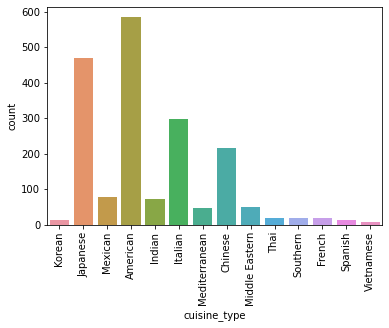

In \[21\]:

    #finding out duplicated rows
    df.duplicated()

Out\[21\]:

    0       False
    1       False
    2       False
    3       False
    4       False
            ...  
    1893    False
    1894    False
    1895    False
    1896    False
    1897    False
    Length: 1898, dtype: bool

There are no duplicated rows.

In \[89\]:

    #check unique day of the week
    df['day_of_the_week'].nunique()

Out\[89\]:

    2

In \[75\]:

    #visiualizing day of the week
    sns.countplot(data=df, x='day_of_the_week');

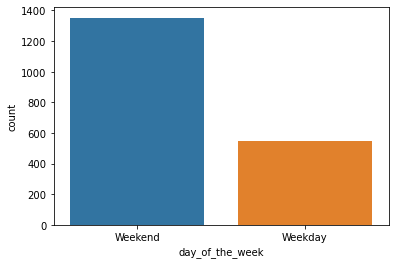

In \[10\]:

    #visualizing countplot for delivery time
    sns.histplot(data=df,x='delivery_time')
    plt.show()
    sns.boxplot(data=df,x='delivery_time')
    plt.show()

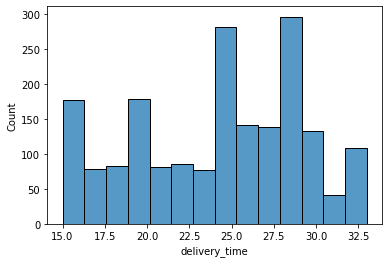

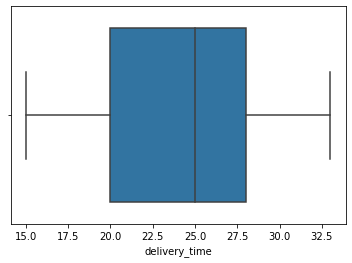

-   There are no outliers for delivery time.

In \[11\]:

    #visualizing food preparation time
    sns.histplot(data=df,x='food_preparation_time')
    plt.show()
    sns.boxplot(data=df,x='food_preparation_time')
    plt.show()

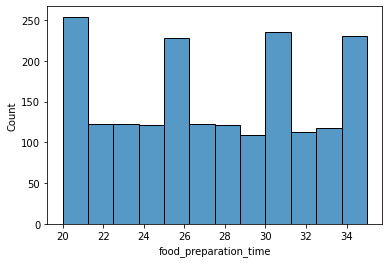

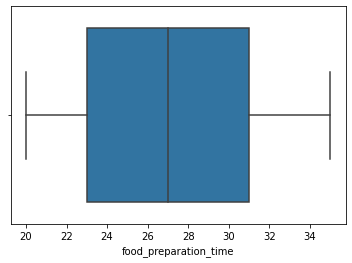

-   There are no outliers for food preparation time.
-   The median time to prepare a meal is 27 minutes.
-   250 orders had their meals prepared within 20 to 21 minutes.

In \[92\]:

    #visualizing rating
    sns.histplot(data=df,x='rating')
    plt.show()

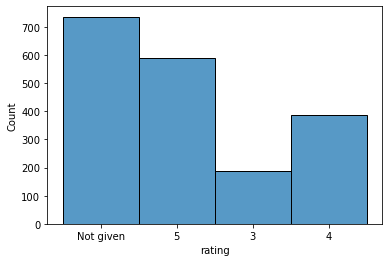

-   There are 736 orders not rated.

In \[13\]:

    #visualizing cost of order
    sns.histplot(data=df,x='cost_of_the_order')
    plt.show()
    sns.boxplot(data=df,x='cost_of_the_order')
    plt.show()

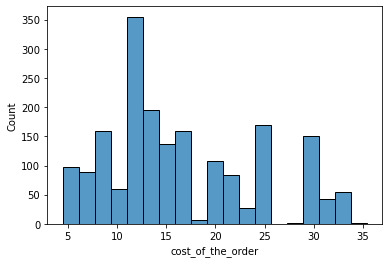

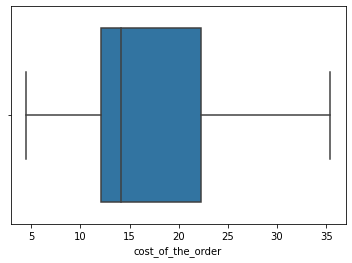

Observation:

-   There are no outliers
-   The histogram count shows more orders ranging from 11 to 12.5
    dollars were serviced the most.
-   The median of cost of order is at 14 dollars.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? \[1 mark\]<a
href="#Question-7:-Which-are-the-top-5-restaurants-in-terms-of-the-number-of-orders-received?-%5B1-mark%5D"
class="anchor-link">¶</a>

In \[14\]:

    #Getting top 5 restaurants with highest number of orders
    df['restaurant_name'].value_counts().reset_index()

Out\[14\]:

|     | index                     | restaurant_name |
|-----|---------------------------|-----------------|
| 0   | Shake Shack               | 219             |
| 1   | The Meatball Shop         | 132             |
| 2   | Blue Ribbon Sushi         | 119             |
| 3   | Blue Ribbon Fried Chicken | 96              |
| 4   | Parm                      | 68              |
| ... | ...                       | ...             |
| 173 | Sushi Choshi              | 1               |
| 174 | Dos Caminos Soho          | 1               |
| 175 | La Follia                 | 1               |
| 176 | Philippe Chow             | 1               |
| 177 | 'wichcraft                | 1               |

178 rows × 2 columns

The top 5 restaurants are Shake Shack with 219 orders, The Meatball Shop
wit 132 orders, Blue Ribbon Sushi with 119 orders, Blue Ribbon Fried
Chicken with 96 orders and Parm restaurant with 68 orders.

### **Question 8**: Which is the most popular cuisine on weekends? \[1 mark\]<a
href="#Question-8:-Which-is-the-most-popular-cuisine-on-weekends?-%5B1-mark%5D"
class="anchor-link">¶</a>

In \[15\]:

    #Getting the most popular cuisine
    plt.figure(figsize=(12,8))
    sns.countplot(data= df, x='cuisine_type', hue='day_of_the_week')
    plt.xticks(rotation=90);

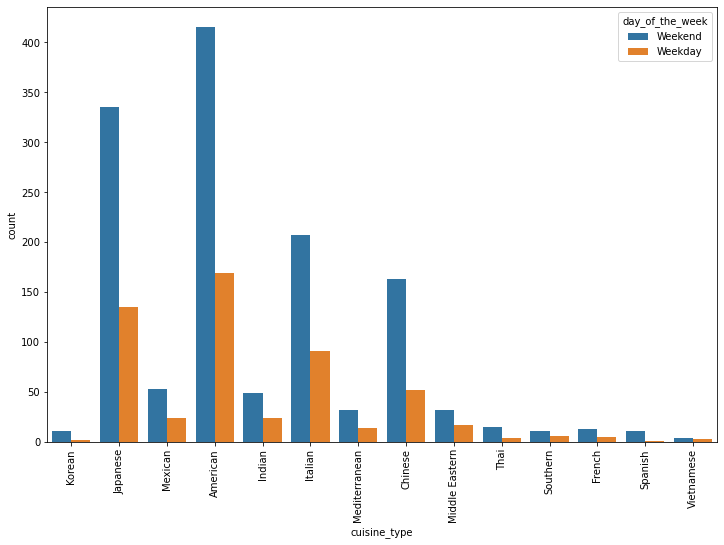

Observations: The American meal is the most important cuisine on
weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? \[2 marks\]<a
href="#Question-9:-What-percentage-of-the-orders-cost-more-than-20-dollars?-%5B2-marks%5D"
class="anchor-link">¶</a>

In \[8\]:

    #copying the dataframe to avoid tampering with the dataframe
    df2 = df.copy()

In \[96\]:

    # Get orders that cost above 20 dollars
    df2_greater_than_20 = df2[df2['cost_of_the_order']>20] ## Write the appropriate column name to get the orders having cost above $20

    # Calculate the number of total orders where the cost is above 20 dollars
    print('The number of total orders that cost above 20 dollars is:', df2_greater_than_20.shape[0])

    # Calculate percentage of such orders in the dataset
    percentage = (df2_greater_than_20.shape[0] / df2.shape[0]) * 100

    print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

    The number of total orders that cost above 20 dollars is: 555
    Percentage of orders above 20 dollars: 29.24 %

### **OR we use the normalize function**<a href="#OR-we-use-the-normalize-function" class="anchor-link">¶</a>

In \[97\]:

    (df2['cost_of_the_order']>20).value_counts()

Out\[97\]:

    False    1343
    True      555
    Name: cost_of_the_order, dtype: int64

In \[98\]:

    (df2['cost_of_the_order']>20).value_counts(normalize=True)

Out\[98\]:

    False    0.707587
    True     0.292413
    Name: cost_of_the_order, dtype: float64

Approximately 555 orders cost more than 20 dollars and they consist of
29.24 percent.

### **Question 10**: What is the mean order delivery time? \[1 mark\]<a
href="#Question-10:-What-is-the-mean-order-delivery-time?-%5B1-mark%5D"
class="anchor-link">¶</a>

In \[109\]:

    #calculating the mean delivery time
    avg_delivery_time= df2['delivery_time'].mean()
    print('The mean delivery time for this dataset is', round(avg_delivery_time, 2), 'minutes')

    The mean delivery time for this dataset is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. \[1 mark\]<a
href="#Question-11:-The-company-has-decided-to-give-20%25-discount-vouchers-to-the-top-3-most-frequent-customers.-Find-the-IDs-of-these-customers-and-the-number-of-orders-they-placed.-%5B1-mark%5D"
class="anchor-link">¶</a>

In \[33\]:

    #Getting the most performing customers 
    df2['customer_id'].value_counts()

Out\[33\]:

    52832     13
    47440     10
    83287      9
    250494     8
    259341     7
              ..
    385426     1
    254913     1
    289597     1
    74412      1
    397537     1
    Name: customer_id, Length: 1200, dtype: int64

The top three customers with number of orders placed includes
customer_id 52832 with 13 orders, 52832 with 10 orders and 83287 with 9
orders.

### Multivariate Analysis<a href="#Multivariate-Analysis" class="anchor-link">¶</a>

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) \[10 marks\]<a
href="#Question-12:-Perform-a-multivariate-analysis-to-explore-relationships-between-the-important-variables-in-the-dataset.-(It-is-a-good-idea-to-explore-relations-between-numerical-variables-as-well-as-relations-between-numerical-and-categorical-variables)-%5B10-marks%5D"
class="anchor-link">¶</a>

Cuisine vs Cost of the order

In \[102\]:

    # Relationship between cost of the order and cuisine type
    plt.figure(figsize=(15,7))
    sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df2, palette = 'PuBu')
    plt.xticks(rotation = 60)
    plt.show()

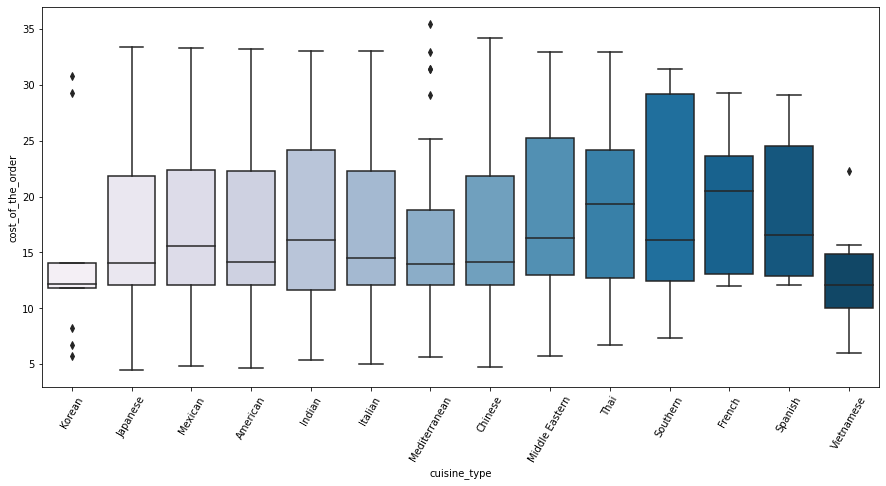

Observations

-   Koreans meals may have been under priced or over priced on certain
    orders.
-   Mediterranean and Vietnamese meals have been over priced a few
    times.
-   An average French meal is more expensive than the rest.

Cuisine vs Food Preparation time

In \[103\]:

    #visualzing between cuisine and food preparation time
    plt.figure(figsize=(15,7))
    sns.boxplot(x = "cuisine_type", y = "food_preparation_time",data = df2, palette = 'PuBu')  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
    plt.xticks(rotation = 60)
    plt.show()

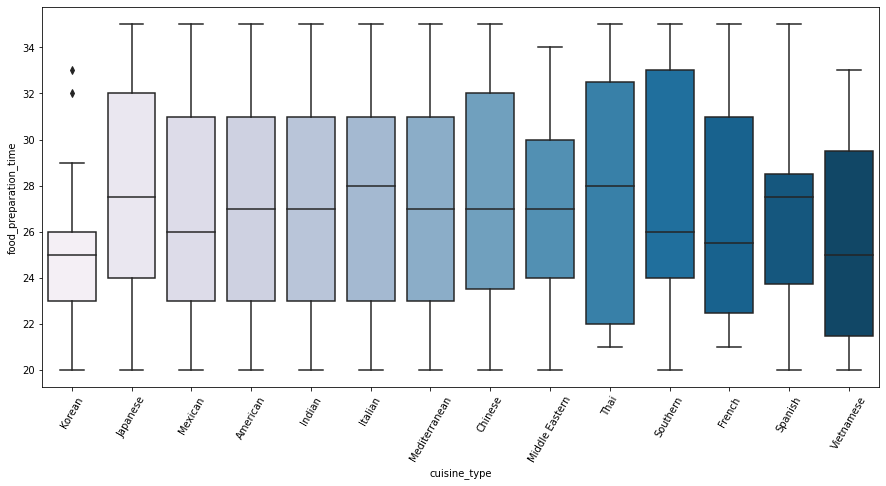

-   Only Korean cuisine had two outliers in food preparation.
-   American, Indian, Mediterranean, Chinese and Middle Eastern had a
    median time of 27 minutes.
-   Italian and Thai had the highest median time .

In \[18\]:

    #Sorting the revenue of the 172 restaurants
    df2.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(20)

Out\[18\]:

    restaurant_name
    Shake Shack                              3579.53
    The Meatball Shop                        2145.21
    Blue Ribbon Sushi                        1903.95
    Blue Ribbon Fried Chicken                1662.29
    Parm                                     1112.76
    RedFarm Broadway                          965.13
    RedFarm Hudson                            921.21
    TAO                                       834.50
    Han Dynasty                               755.29
    Blue Ribbon Sushi Bar & Grill             666.62
    Rubirosa                                  660.45
    Sushi of Gari 46                          640.87
    Nobu Next Door                            623.67
    Five Guys Burgers and Fries               506.47
    Momoya                                    492.13
    Chipotle Mexican Grill $1.99 Delivery     491.69
    Blue Ribbon Sushi Izakaya                 485.09
    Tamarind TriBeCa                          426.71
    Jack's Wife Freda                         416.75
    Bareburger                                399.74
    Name: cost_of_the_order, dtype: float64

Top performing restaurant is Shake Shack with 3579.53 dollars

In \[105\]:

    # Relationship between rating and delivery time
    plt.figure(figsize=(15, 7))
    sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
    plt.show()

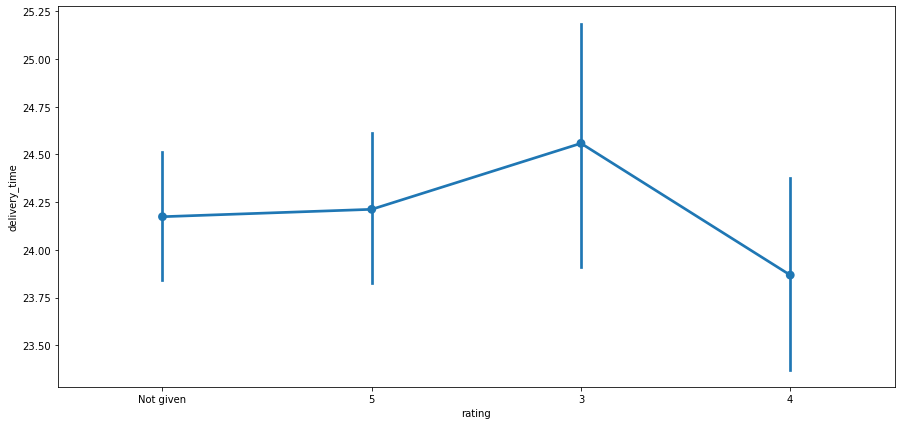

-   For deliveries made at a median time of 24.60 minutes had a rating
    of 3 which is the highest.

In \[26\]:

    sns.pairplot(df2);

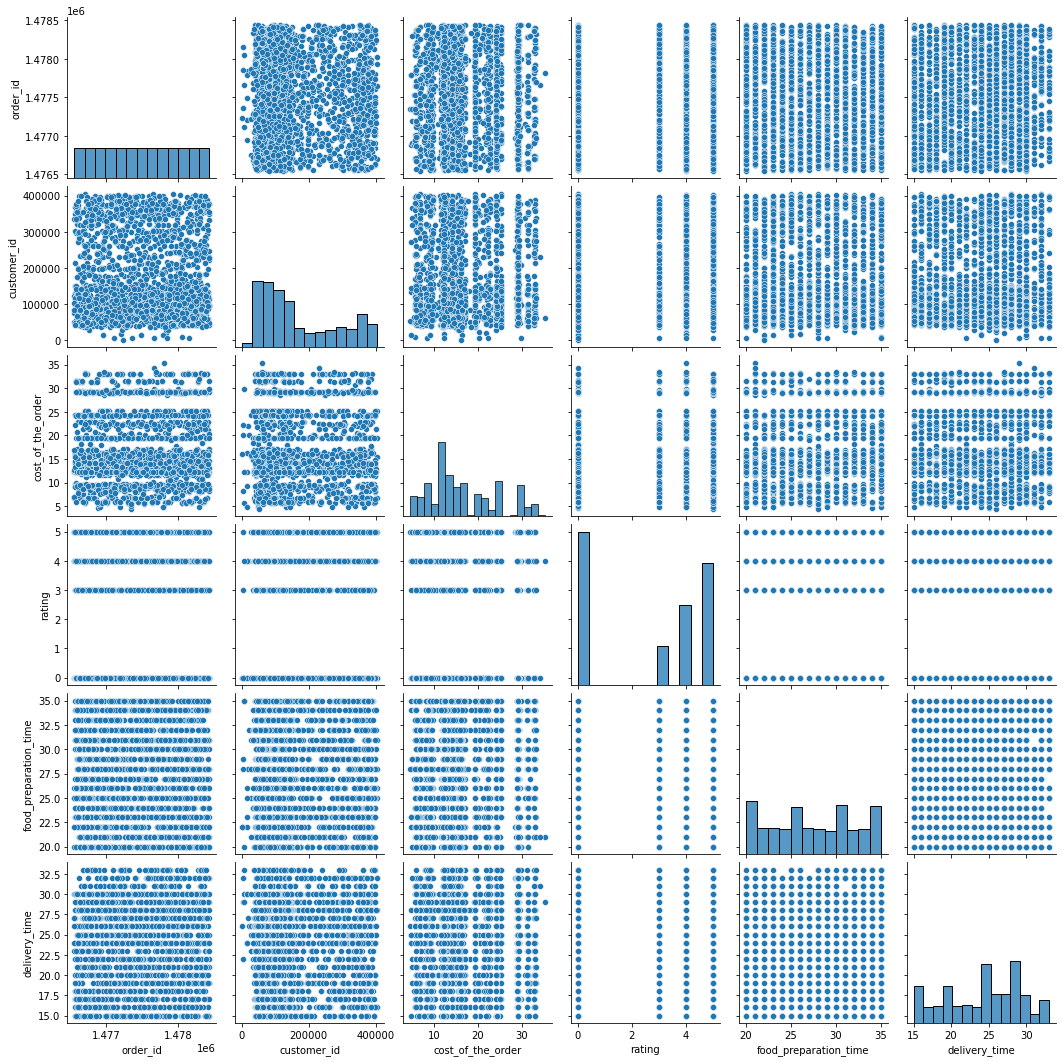

In \[27\]:

    corr = df2.corr()

    # plot the heatmap

    plt.figure(figsize=(15, 7))
    sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
    plt.show()

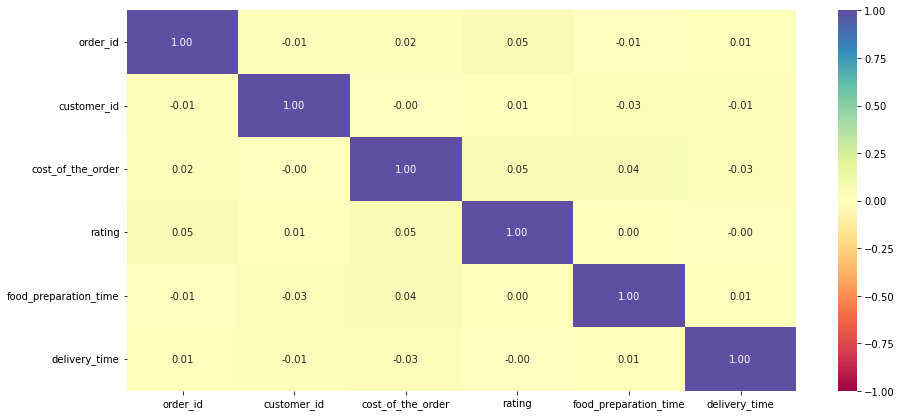

There is positive correlation with cost_of_order and rating also
order_id and rating.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. \[3 marks\]<a
href="#Question-13:-The-company-wants-to-provide-a-promotional-offer-in-the-advertisement-of-the-restaurants.-The-condition-to-get-the-offer-is-that-the-restaurants-must-have-a-rating-count-of-more-than-50-and-the-average-rating-should-be-greater-than-4.-Find-the-restaurants-fulfilling-the-criteria-to-get-the-promotional-offer.-%5B3-marks%5D"
class="anchor-link">¶</a>

In \[106\]:

    #replacing Not given with zero, this would not impact the dataframe positively or negatively
    df2['rating']= df2["rating"].replace("Not given", 0)

In \[107\]:

    #changing the data type to integer
    df2['rating'] = df2['rating'].astype('int')

In \[108\]:

    df2.head()

Out\[108\]:

|     | order_id | customer_id | restaurant_name           | cuisine_type | cost_of_the_order | day_of_the_week | rating | food_preparation_time | delivery_time |
|-----|----------|-------------|---------------------------|--------------|-------------------|-----------------|--------|-----------------------|---------------|
| 0   | 1477147  | 337525      | Hangawi                   | Korean       | 30.75             | Weekend         | 0      | 25                    | 20            |
| 1   | 1477685  | 358141      | Blue Ribbon Sushi Izakaya | Japanese     | 12.08             | Weekend         | 0      | 25                    | 23            |
| 2   | 1477070  | 66393       | Cafe Habana               | Mexican      | 12.23             | Weekday         | 5      | 23                    | 28            |
| 3   | 1477334  | 106968      | Blue Ribbon Fried Chicken | American     | 29.20             | Weekend         | 3      | 25                    | 15            |
| 4   | 1478249  | 76942       | Dirty Bird to Go          | American     | 11.59             | Weekday         | 4      | 25                    | 24            |

In \[25\]:

    df2.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 1898 entries, 0 to 1897
    Data columns (total 9 columns):
     #   Column                 Non-Null Count  Dtype  
    ---  ------                 --------------  -----  
     0   order_id               1898 non-null   int64  
     1   customer_id            1898 non-null   int64  
     2   restaurant_name        1898 non-null   object 
     3   cuisine_type           1898 non-null   object 
     4   cost_of_the_order      1898 non-null   float64
     5   day_of_the_week        1898 non-null   object 
     6   rating                 1898 non-null   int32  
     7   food_preparation_time  1898 non-null   int64  
     8   delivery_time          1898 non-null   int64  
    dtypes: float64(1), int32(1), int64(4), object(3)
    memory usage: 126.2+ KB

In \[28\]:

    #getting the average rating for each restaurant
    avg_rating=df2.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index()
    avg_rating

Out\[28\]:

|     | restaurant_name   | rating |
|-----|-------------------|--------|
| 0   | 'wichcraft        | 5.0    |
| 1   | Philippe Chow     | 5.0    |
| 2   | Bukhara Grill     | 5.0    |
| 3   | Kambi Ramen House | 5.0    |
| 4   | Hunan Manor       | 5.0    |
| ... | ...               | ...    |
| 173 | Market Table      | 0.0    |
| 174 | Paul & Jimmy's    | 0.0    |
| 175 | Posto             | 0.0    |
| 176 | Room Service      | 0.0    |
| 177 | Lamarca Pasta     | 0.0    |

178 rows × 2 columns

In \[29\]:

    #rename the average rating column
    avg_rating.rename(columns={'rating':'Avg_rating'},inplace=True)
    avg_rating.head()

Out\[29\]:

|     | restaurant_name   | Avg_rating |
|-----|-------------------|------------|
| 0   | 'wichcraft        | 5.0        |
| 1   | Philippe Chow     | 5.0        |
| 2   | Bukhara Grill     | 5.0        |
| 3   | Kambi Ramen House | 5.0        |
| 4   | Hunan Manor       | 5.0        |

In \[30\]:

    #getting the rating count for each restaurant
    restaurant_count=df2.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()
    restaurant_count

Out\[30\]:

|     | restaurant_name           | rating |
|-----|---------------------------|--------|
| 0   | Shake Shack               | 219    |
| 1   | The Meatball Shop         | 132    |
| 2   | Blue Ribbon Sushi         | 119    |
| 3   | Blue Ribbon Fried Chicken | 96     |
| 4   | Parm                      | 68     |
| ... | ...                       | ...    |
| 173 | Klong                     | 1      |
| 174 | Kambi Ramen House         | 1      |
| 175 | Il Bambino                | 1      |
| 176 | Hunan Manor               | 1      |
| 177 | Lamarca Pasta             | 1      |

178 rows × 2 columns

In \[31\]:

    #rename the rating_count column 
    restaurant_count.rename(columns={'rating':'rating_counts'},inplace=True)
    restaurant_count.head()

Out\[31\]:

|     | restaurant_name           | rating_counts |
|-----|---------------------------|---------------|
| 0   | Shake Shack               | 219           |
| 1   | The Meatball Shop         | 132           |
| 2   | Blue Ribbon Sushi         | 119           |
| 3   | Blue Ribbon Fried Chicken | 96            |
| 4   | Parm                      | 68            |

In \[32\]:

    #getting the rating count for restaurants from 50 and above
    restaurant_50 = restaurant_count[restaurant_count['rating_counts']>50]
    restaurant_50

Out\[32\]:

|     | restaurant_name           | rating_counts |
|-----|---------------------------|---------------|
| 0   | Shake Shack               | 219           |
| 1   | The Meatball Shop         | 132           |
| 2   | Blue Ribbon Sushi         | 119           |
| 3   | Blue Ribbon Fried Chicken | 96            |
| 4   | Parm                      | 68            |
| 5   | RedFarm Broadway          | 59            |
| 6   | RedFarm Hudson            | 55            |

In \[33\]:

    #getting the average rating for restaurants from 4 and above
    avg_rating = avg_rating[avg_rating['Avg_rating']>4]
    avg_rating

Out\[33\]:

|     | restaurant_name               | Avg_rating |
|-----|-------------------------------|------------|
| 0   | 'wichcraft                    | 5.000000   |
| 1   | Philippe Chow                 | 5.000000   |
| 2   | Bukhara Grill                 | 5.000000   |
| 3   | Kambi Ramen House             | 5.000000   |
| 4   | Hunan Manor                   | 5.000000   |
| 5   | Chola Eclectic Indian Cuisine | 5.000000   |
| 6   | Chote Nawab                   | 5.000000   |
| 7   | Cipriani Le Specialita        | 5.000000   |
| 8   | Hot Kitchen                   | 5.000000   |
| 9   | Song Thai Restaurant & Bar    | 5.000000   |
| 10  | Moonstruck on Second          | 5.000000   |
| 11  | Dig Inn Seasonal Market       | 5.000000   |
| 12  | Samurai Mama                  | 5.000000   |
| 13  | Dos Caminos Soho              | 5.000000   |
| 14  | Haru Gramercy Park            | 5.000000   |
| 15  | Taro Sushi                    | 5.000000   |
| 16  | Klong                         | 5.000000   |
| 17  | Cafe de La Esquina            | 5.000000   |
| 18  | Socarrat Paella Bar           | 5.000000   |
| 19  | Big Daddy's                   | 5.000000   |
| 20  | 67 Burger                     | 5.000000   |
| 21  | Anjappar Chettinad            | 5.000000   |
| 22  | Balade                        | 5.000000   |
| 23  | Galli Restaurant              | 5.000000   |
| 24  | Dickson's Farmstand Meats     | 4.666667   |
| 25  | Hummus Place                  | 4.666667   |
| 26  | Le Grainne Cafe               | 4.500000   |

In \[34\]:

    #merging the avg_rating dataframe and rating count dataframe to find restaurants with avg_rating of 4 and counts of >=50
    df2_top= avg_rating.merge(restaurant_50, on = 'restaurant_name', how = 'inner')
    df2_top

Out\[34\]:

|     | restaurant_name | Avg_rating | rating_counts |
|-----|-----------------|------------|---------------|

#### Observations:<a href="#Observations:" class="anchor-link">¶</a>

There is no restaurant that meet that criteria, that means some of the
best performing restaurants do not get rated often.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. \[3 marks\]<a
href="#Question-14:-The-company-charges-the-restaurant-25%25-on-the-orders-having-cost-greater-than-20-dollars-and-15%25-on-the-orders-having-cost-greater-than-5-dollars.-Find-the-net-revenue-generated-by-the-company-across-all-orders.-%5B3-marks%5D"
class="anchor-link">¶</a>

In \[35\]:

    #defining a function to calculate charge from the company on the 178 restaurants

    def charge(s):
        if (19.99 >= s > 5):
            return s+s*0.15
        elif (s >= 20):
            return s+s*0.25
        
    df2['new_charge'] = df2['cost_of_the_order'].apply(charge)
    df2

Out\[35\]:

|      | order_id | customer_id | restaurant_name                        | cuisine_type  | cost_of_the_order | day_of_the_week | rating | food_preparation_time | delivery_time | new_charge |
|------|----------|-------------|----------------------------------------|---------------|-------------------|-----------------|--------|-----------------------|---------------|------------|
| 0    | 1477147  | 337525      | Hangawi                                | Korean        | 30.75             | Weekend         | 0      | 25                    | 20            | 38.4375    |
| 1    | 1477685  | 358141      | Blue Ribbon Sushi Izakaya              | Japanese      | 12.08             | Weekend         | 0      | 25                    | 23            | 13.8920    |
| 2    | 1477070  | 66393       | Cafe Habana                            | Mexican       | 12.23             | Weekday         | 5      | 23                    | 28            | 14.0645    |
| 3    | 1477334  | 106968      | Blue Ribbon Fried Chicken              | American      | 29.20             | Weekend         | 3      | 25                    | 15            | 36.5000    |
| 4    | 1478249  | 76942       | Dirty Bird to Go                       | American      | 11.59             | Weekday         | 4      | 25                    | 24            | 13.3285    |
| ...  | ...      | ...         | ...                                    | ...           | ...               | ...             | ...    | ...                   | ...           | ...        |
| 1893 | 1476701  | 292602      | Chipotle Mexican Grill \$1.99 Delivery | Mexican       | 22.31             | Weekend         | 5      | 31                    | 17            | 27.8875    |
| 1894 | 1477421  | 397537      | The Smile                              | American      | 12.18             | Weekend         | 5      | 31                    | 19            | 14.0070    |
| 1895 | 1477819  | 35309       | Blue Ribbon Sushi                      | Japanese      | 25.22             | Weekday         | 0      | 31                    | 24            | 31.5250    |
| 1896 | 1477513  | 64151       | Jack's Wife Freda                      | Mediterranean | 12.18             | Weekday         | 5      | 23                    | 31            | 14.0070    |
| 1897 | 1478056  | 120353      | Blue Ribbon Sushi                      | Japanese      | 19.45             | Weekend         | 0      | 28                    | 24            | 22.3675    |

1898 rows × 10 columns

In \[36\]:

    #calculating the new net revenue after applying changes
    revenue = df2['new_charge'].sum()
    print('The new revenue after charge is applied: ',revenue)

    The new revenue after charge is applied:  37438.383

In \[81\]:

    #calculating the new net revenue before applying changes
    revenue1 = df2['cost_of_the_order'].sum()
    print('The revenue before charge is applied: ',revenue1)

    The revenue before charge is applied:  31314.82

In \[82\]:

    #calculating profit
    profit = revenue - revenue1
    profit

Out\[82\]:

    6123.563000000002

#### Observations:<a href="#Observations:" class="anchor-link">¶</a>

The revenue generated by the 172 restaurants is 31314.82 dollars before
charge is applied and after charge is 37438.38 dollars. The profit the
company made from deliveries is 6123.56 dollars hence more deliveries
can boost more cashflow for the delivery company.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) \[2 marks\]<a
href="#Question-15:-The-company-wants-to-analyze-the-total-time-required-to-deliver-the-food.-What-percentage-of-orders-take-more-than-60-minutes-to-get-delivered-from-the-time-the-order-is-placed?-(The-food-has-to-be-prepared-and-then-delivered.)-%5B2-marks%5D"
class="anchor-link">¶</a>

In \[37\]:

    #exploring the first 5 rows of the data
    df2.head()

Out\[37\]:

|     | order_id | customer_id | restaurant_name           | cuisine_type | cost_of_the_order | day_of_the_week | rating | food_preparation_time | delivery_time | new_charge |
|-----|----------|-------------|---------------------------|--------------|-------------------|-----------------|--------|-----------------------|---------------|------------|
| 0   | 1477147  | 337525      | Hangawi                   | Korean       | 30.75             | Weekend         | 0      | 25                    | 20            | 38.4375    |
| 1   | 1477685  | 358141      | Blue Ribbon Sushi Izakaya | Japanese     | 12.08             | Weekend         | 0      | 25                    | 23            | 13.8920    |
| 2   | 1477070  | 66393       | Cafe Habana               | Mexican      | 12.23             | Weekday         | 5      | 23                    | 28            | 14.0645    |
| 3   | 1477334  | 106968      | Blue Ribbon Fried Chicken | American     | 29.20             | Weekend         | 3      | 25                    | 15            | 36.5000    |
| 4   | 1478249  | 76942       | Dirty Bird to Go          | American     | 11.59             | Weekday         | 4      | 25                    | 24            | 13.3285    |

In \[38\]:

    # suming up the food preparation time with delivery time to get total time.
    df2['total_time'] = df2.loc[:,['food_preparation_time','delivery_time']].sum(axis=1)
    df2

Out\[38\]:

|      | order_id | customer_id | restaurant_name                        | cuisine_type  | cost_of_the_order | day_of_the_week | rating | food_preparation_time | delivery_time | new_charge | total_time |
|------|----------|-------------|----------------------------------------|---------------|-------------------|-----------------|--------|-----------------------|---------------|------------|------------|
| 0    | 1477147  | 337525      | Hangawi                                | Korean        | 30.75             | Weekend         | 0      | 25                    | 20            | 38.4375    | 45         |
| 1    | 1477685  | 358141      | Blue Ribbon Sushi Izakaya              | Japanese      | 12.08             | Weekend         | 0      | 25                    | 23            | 13.8920    | 48         |
| 2    | 1477070  | 66393       | Cafe Habana                            | Mexican       | 12.23             | Weekday         | 5      | 23                    | 28            | 14.0645    | 51         |
| 3    | 1477334  | 106968      | Blue Ribbon Fried Chicken              | American      | 29.20             | Weekend         | 3      | 25                    | 15            | 36.5000    | 40         |
| 4    | 1478249  | 76942       | Dirty Bird to Go                       | American      | 11.59             | Weekday         | 4      | 25                    | 24            | 13.3285    | 49         |
| ...  | ...      | ...         | ...                                    | ...           | ...               | ...             | ...    | ...                   | ...           | ...        | ...        |
| 1893 | 1476701  | 292602      | Chipotle Mexican Grill \$1.99 Delivery | Mexican       | 22.31             | Weekend         | 5      | 31                    | 17            | 27.8875    | 48         |
| 1894 | 1477421  | 397537      | The Smile                              | American      | 12.18             | Weekend         | 5      | 31                    | 19            | 14.0070    | 50         |
| 1895 | 1477819  | 35309       | Blue Ribbon Sushi                      | Japanese      | 25.22             | Weekday         | 0      | 31                    | 24            | 31.5250    | 55         |
| 1896 | 1477513  | 64151       | Jack's Wife Freda                      | Mediterranean | 12.18             | Weekday         | 5      | 23                    | 31            | 14.0070    | 54         |
| 1897 | 1478056  | 120353      | Blue Ribbon Sushi                      | Japanese      | 19.45             | Weekend         | 0      | 28                    | 24            | 22.3675    | 52         |

1898 rows × 11 columns

In \[60\]:

    #creating a new dataframe for orders that took more than 60 minutes to prepare
    total_time_60 = df2[df2['total_time']>60]
    total_time_60

Out\[60\]:

|      | order_id | customer_id | restaurant_name             | cuisine_type   | cost_of_the_order | day_of_the_week | rating | food_preparation_time | delivery_time | new_charge | total_time |
|------|----------|-------------|-----------------------------|----------------|-------------------|-----------------|--------|-----------------------|---------------|------------|------------|
| 7    | 1477859  | 89574       | Barbounia                   | Mediterranean  | 5.97              | Weekday         | 3      | 33                    | 30            | 6.8655     | 63         |
| 10   | 1477895  | 143926      | Big Wong Restaurant Œ\_¤¾Ñ¼ | Chinese        | 5.92              | Weekday         | 0      | 34                    | 28            | 6.8080     | 62         |
| 19   | 1477354  | 67487       | Blue Ribbon Sushi           | Japanese       | 16.20             | Weekend         | 4      | 35                    | 26            | 18.6300    | 61         |
| 24   | 1476714  | 363783      | Cafe Mogador                | Middle Eastern | 15.86             | Weekday         | 0      | 32                    | 29            | 18.2390    | 61         |
| 54   | 1477760  | 130507      | Jack's Wife Freda           | Mediterranean  | 22.75             | Weekend         | 3      | 35                    | 29            | 28.4375    | 64         |
| ...  | ...      | ...         | ...                         | ...            | ...               | ...             | ...    | ...                   | ...           | ...        | ...        |
| 1869 | 1476923  | 50199       | J. G. Melon                 | American       | 19.40             | Weekday         | 4      | 35                    | 26            | 22.3100    | 61         |
| 1873 | 1478148  | 261371      | Shake Shack                 | American       | 22.31             | Weekend         | 0      | 35                    | 28            | 27.8875    | 63         |
| 1875 | 1478039  | 292343      | Amy Ruth's                  | Southern       | 12.23             | Weekday         | 0      | 32                    | 33            | 14.0645    | 65         |
| 1880 | 1477466  | 222734      | Shake Shack                 | American       | 13.97             | Weekend         | 5      | 35                    | 27            | 16.0655    | 62         |
| 1889 | 1478190  | 94152       | RedFarm Broadway            | Chinese        | 8.68              | Weekday         | 3      | 33                    | 30            | 9.9820     | 63         |

200 rows × 11 columns

Observation: 200 orders took more than an hour to prepare and deliver to
the customer.

In \[80\]:

    #visualizing relationship between cuisine type and food preparation time
    df2[df2['total_time']>60].groupby(['cuisine_type'])['food_preparation_time'].mean().plot(kind = "bar")
    plt.xlabel('cuisine_type', fontsize=10, color='r')
    plt.ylabel('Avg_food_preparation_time', fontsize=10, color='b');

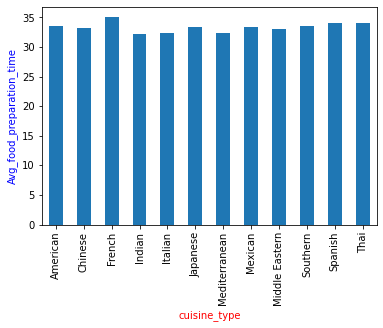

All cuisines in the above plot take an average of 30 minutes to prepare,
with French cuisine taking 35 minutes.

In \[40\]:

    #calculating proportion of orders that took more than 60 minutes to deliver.
    total_time_60['total_time'].value_counts(normalize = True)

Out\[40\]:

    61    0.265
    62    0.200
    64    0.170
    63    0.165
    65    0.095
    67    0.045
    68    0.035
    66    0.025
    Name: total_time, dtype: float64

In \[41\]:

    #creating a new dataframe for orders that took more than 60 minutes to prepare
    total_time_60['day_of_the_week'].value_counts()

Out\[41\]:

    Weekday    119
    Weekend     81
    Name: day_of_the_week, dtype: int64

#### Observations:<a href="#Observations:" class="anchor-link">¶</a>

2.5% of the orders were delivered in 66 minutes while 26.5% took 61
minutes to get to the customer.

Further exploration of this data set revealed that a higher number of
these orders were placed during the week day.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? \[2 marks\]<a
href="#Question-16:-The-company-wants-to-analyze-the-delivery-time-of-the-orders-on-weekdays-and-weekends.-How-does-the-mean-delivery-time-vary-during-weekdays-and-weekends?-%5B2-marks%5D"
class="anchor-link">¶</a>

In \[42\]:

    df2.head()

Out\[42\]:

|     | order_id | customer_id | restaurant_name           | cuisine_type | cost_of_the_order | day_of_the_week | rating | food_preparation_time | delivery_time | new_charge | total_time |
|-----|----------|-------------|---------------------------|--------------|-------------------|-----------------|--------|-----------------------|---------------|------------|------------|
| 0   | 1477147  | 337525      | Hangawi                   | Korean       | 30.75             | Weekend         | 0      | 25                    | 20            | 38.4375    | 45         |
| 1   | 1477685  | 358141      | Blue Ribbon Sushi Izakaya | Japanese     | 12.08             | Weekend         | 0      | 25                    | 23            | 13.8920    | 48         |
| 2   | 1477070  | 66393       | Cafe Habana               | Mexican      | 12.23             | Weekday         | 5      | 23                    | 28            | 14.0645    | 51         |
| 3   | 1477334  | 106968      | Blue Ribbon Fried Chicken | American     | 29.20             | Weekend         | 3      | 25                    | 15            | 36.5000    | 40         |
| 4   | 1478249  | 76942       | Dirty Bird to Go          | American     | 11.59             | Weekday         | 4      | 25                    | 24            | 13.3285    | 49         |

In \[54\]:

    #grouping the delivery time into week day and weekend.
    df2.groupby(['day_of_the_week'])['delivery_time'].mean()

Out\[54\]:

    day_of_the_week
    Weekday    28.340037
    Weekend    22.470022
    Name: delivery_time, dtype: float64

In \[77\]:

    #plotting the average delivery time against day of the week 
    df2.groupby(['day_of_the_week'])['delivery_time'].mean().plot(kind = "bar")
    plt.xlabel('day_of_the_week', fontsize=15, color='r')
    plt.ylabel('avg_delivery_time', fontsize=15, color='b');

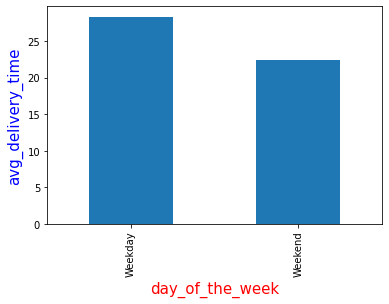

#### Observations:<a href="#Observations:" class="anchor-link">¶</a>

The average delivery time on week days takes additional six minutes due
to the fact it is a work day.

### Conclusion and Recommendations<a href="#Conclusion-and-Recommendations" class="anchor-link">¶</a>

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) \[6 marks\]<a
href="#Question-17:-What-are-your-conclusions-from-the-analysis?-What-recommendations-would-you-like-to-share-to-help-improve-the-business?-(You-can-use-cuisine-type-and-feedback-ratings-to-drive-your-business-recommendations.)-%5B6-marks%5D"
class="anchor-link">¶</a>

#### **Conclusions**<a href="#Conclusions" class="anchor-link">¶</a>

We analyzed a dataset of nearly 1898 orders frm 172 restaurants in New
York . We have been able to conclude that -

1.  American cuisines are most popular ordered meal in New York
2.  Contrary to intuition, more orders are made on weekends.
3.  There is a high demand for Japanese and American cuisines.
4.  The busy nature of the streets during week days increases the
    average delivery time by six minutes.
5.  A large percentage of the customers do not take the rating process
    seriously.

### Recommendations:<a href="#Recommendations:" class="anchor-link">¶</a>

-   New York food business is booming and there is room for improvement.
-   The restaurants should anticipate more orders for American and
    Japanese cuisines
-   Introduce a pre-cooking technique to shorten the food preparation
    time .
-   Shifts should be introduced on weekends to reduce fatigue when
    servicing customers.
-   Purchase of more delivery vehicles to meet the demand.
-   A compulsory rating page for each delivery must be included in the
    app to collate useful data.
-   Installation of a GPs map to guide the delivery man to avoid traffic
    jams.

------------------------------------------------------------------------